In [1]:
import bbmaster as mst
import numpy as np
import matplotlib.pyplot as plt
import pymaster as nmt
import healpy as hp

### 1. Setup
- Read mask.
- Define bandpower bins
- Initialize bandpower window function calculator

In [2]:
# Read mask
nside = 64
msk = hp.read_map("../SensitivityCheck/data/mask_apodized.fits")
# Generate NaMaster bins
b = nmt.NmtBin(nside, nlb=10)
# Bbl calculator
# Dictionary defining method to generate delta sims (not many options yet!)
dsim = {'stats': 'Gaussian'}
# Dictionary defining method to filter (just masking for now)
filt = {'mask': msk}
bc = mst.DeltaBbl(nside, dsim, filt, b)

### 2. Compute exact bandpowers
Now let's use NaMaster to compute the exact bandpower windows, and plot them

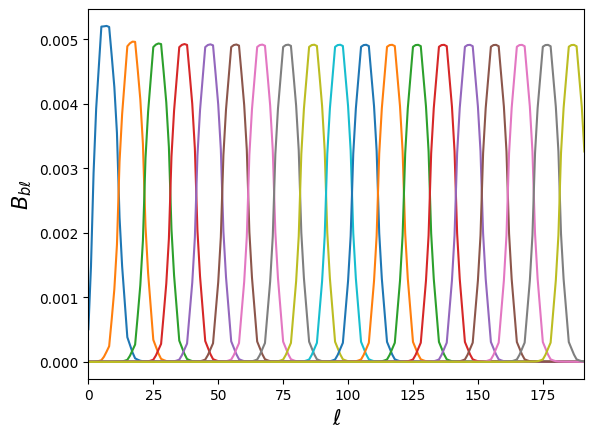

In [3]:
f = nmt.NmtField(hp.ud_grade(msk, nside_out=nside), None, spin=0)
w = nmt.NmtWorkspace()
w.compute_coupling_matrix(f, f, b)
mcm = w.get_coupling_matrix()

bpw_true = np.array([b.bin_cell(m) for m in mcm.T]).T

for bpw in bpw_true:
    plt.plot(bpw)
plt.xlim([0, 3*nside-1])
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$B_{b\ell}$', fontsize=15);

### 3. Compute bandpower windows through simulations

In [4]:
bpw_num = bc.gen_Bbl_all()

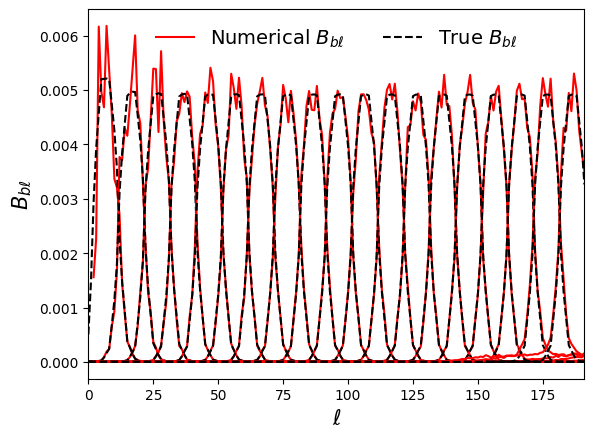

In [6]:
for bpw_t, bpw_n in zip(bpw_true, bpw_num):
    plt.plot(bc.get_ells(), bpw_n, 'r-')
    plt.plot(bpw_t, 'k--')
plt.plot([-1], [0], 'r-', label='Numerical $B_{b\ell}$')
plt.plot([-1], [0], 'k--', label='True $B_{b\ell}$')
plt.xlim([0, 3*nside-1])
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$B_{b\ell}$', fontsize=15)
plt.legend(ncol=2, loc='upper center', fontsize=14, frameon=False);

Uuuh, notice the crap in the last few bandpowers? This is all HEALPix rubbish for $\ell>2 N_{\rm side}$, so just a reminder that we need to throw that away!